In [90]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [91]:
sentence = "Darth Vader is the villain"

dc = {s: i for i, s in enumerate(sorted(sentence.replace(',', '').split()))}
print(dc)

{'Darth': 0, 'Vader': 1, 'is': 2, 'the': 3, 'villain': 4}


In [92]:
# Convert sentence words to integer indices using the vocabulary dictionary
r = [dc[i] for i in sentence.replace(',', '').split()]
sentence_int = torch.tensor(r)
print(sentence_int)

tensor([0, 1, 2, 3, 4])


In [93]:
vocab_size = len(dc)  # Use actual vocabulary size from our sentence
torch.manual_seed(123)
embed = nn.Embedding(vocab_size, 3)
embedded_sentence = embed(sentence_int).detach()
print(embedded_sentence)
print(embedded_sentence.shape)

tensor([[-0.1115,  0.1204, -0.3696],
        [-0.2404, -1.1969,  0.2093],
        [-0.9724, -0.7550,  0.3239],
        [-0.1085,  0.2103, -0.3908],
        [ 0.2350,  0.6653,  0.3528]])
torch.Size([5, 3])


In [94]:
torch.manual_seed(42)

# Set dimensions for attention mechanism
d = embedded_sentence.shape[1]  # Dimension of embeddings (3)
d_q, d_k, d_v = 2, 2, 4  # Dimensions for query, key, and value matrices

In [95]:
# Initialize learnable weight matrices for query, key, and value transformations
W_query = torch.nn.Parameter(torch.rand(d, d_q))
W_key = torch.nn.Parameter(torch.rand(d, d_k))
W_value = torch.nn.Parameter(torch.rand(d, d_v))

# Compute query, key, and value matrices by linear transformation
query = embedded_sentence @ W_query
key = embedded_sentence @ W_key
value = embedded_sentence @ W_value

In [96]:
# Calculate attention scores and weights
attention_scores = query @ key.T
attention_scores = attention_scores / math.sqrt(d_k)  # Scale by sqrt(d_k)
attention_weights = F.softmax(attention_scores, dim=-1)  # Normalize with softmax

print("Attention scores:")
print(attention_scores)
print("\nAttention weights:")
print(attention_weights)

Attention scores:
tensor([[ 0.0793,  0.1713,  0.1917,  0.0699, -0.2127],
        [ 0.3650,  0.6115,  0.8709,  0.3361, -0.8485],
        [ 0.4811,  0.9427,  1.1566,  0.4321, -1.2194],
        [ 0.0583,  0.1389,  0.1416,  0.0503, -0.1659],
        [-0.3304, -0.5910, -0.7909, -0.3013,  0.7958]], grad_fn=<DivBackward0>)

Attention weights:
tensor([[0.2019, 0.2214, 0.2259, 0.2000, 0.1508],
        [0.1921, 0.2458, 0.3185, 0.1866, 0.0571],
        [0.1759, 0.2790, 0.3456, 0.1674, 0.0321],
        [0.2015, 0.2184, 0.2190, 0.1999, 0.1611],
        [0.1535, 0.1183, 0.0969, 0.1580, 0.4734]], grad_fn=<SoftmaxBackward0>)


In [97]:
# Compute context vector as weighted sum of values
context_vector = attention_weights @ value
print(context_vector)

tensor([[-0.4776, -0.3054, -0.2745, -0.2731],
        [-0.7215, -0.4611, -0.4009, -0.4174],
        [-0.8208, -0.5202, -0.4438, -0.4680],
        [-0.4551, -0.2905, -0.2628, -0.2584],
        [ 0.1230,  0.1075,  0.0377,  0.1627]], grad_fn=<MmBackward0>)


In [98]:
# Note: Attention weights differ from attention scores because softmax normalizes
# the scores into probabilities that sum to 1 across each row

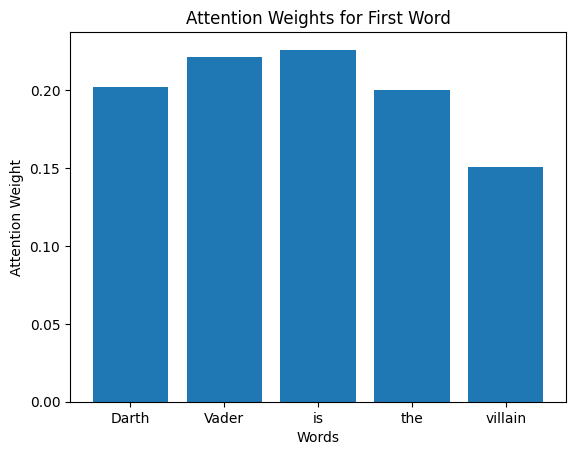

In [99]:
# Visualize attention weights for the first word
plt.bar(range(len(sentence.split())), attention_weights[0].detach().numpy())
plt.xticks(range(len(sentence.split())), sentence.replace(',', '').split())
plt.title("Attention Weights for First Word")
plt.xlabel("Words")
plt.ylabel("Attention Weight")
plt.show()

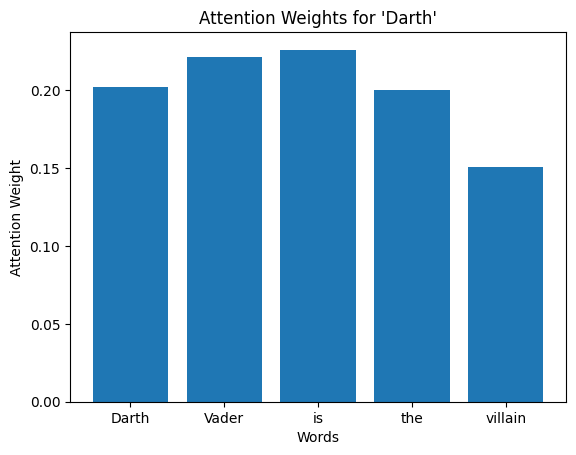

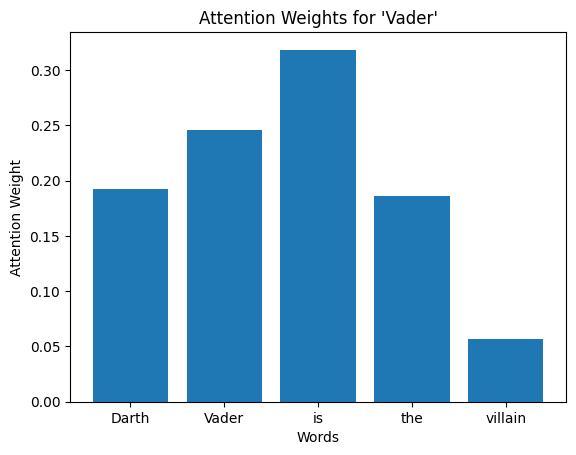

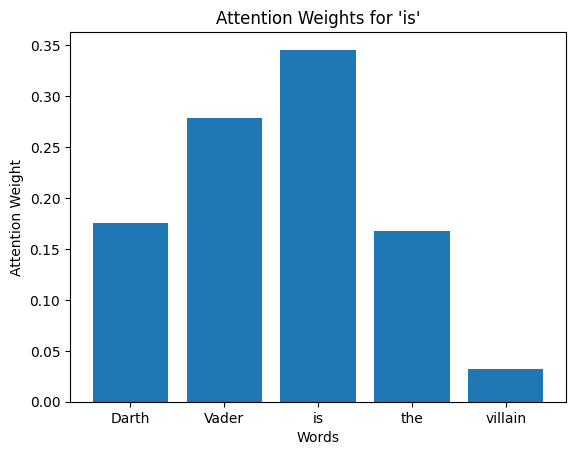

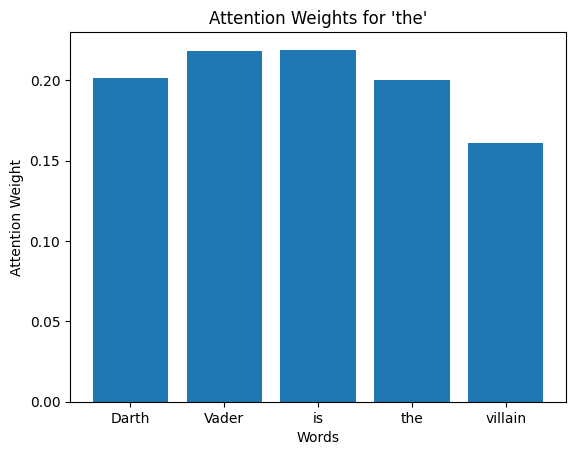

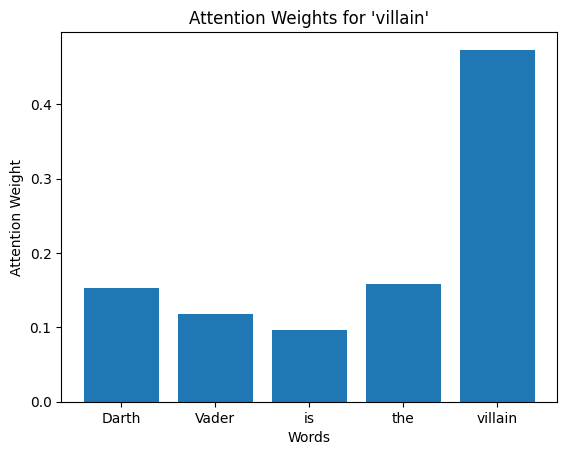

In [100]:
# Attention weights for all words
for i, word in enumerate(sentence.replace(',', '').split()):
    plt.bar(range(len(sentence.split())), attention_weights[i].detach().numpy())
    plt.xticks(range(len(sentence.split())), sentence.replace(',', '').split())
    plt.title(f"Attention Weights for '{word}'")
    plt.xlabel("Words")
    plt.ylabel("Attention Weight")
    plt.show()

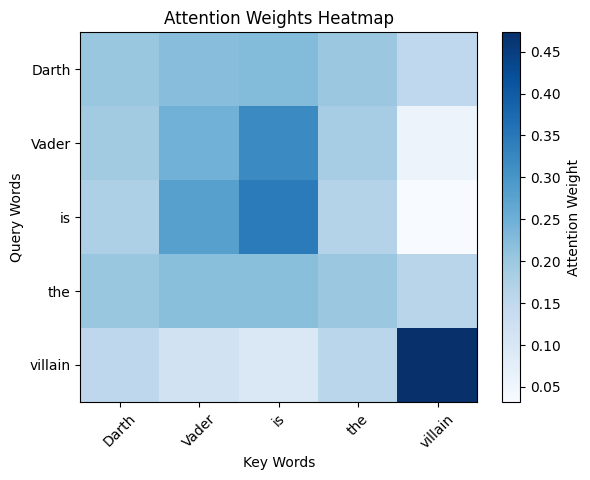

In [101]:
# Visualize the attention weights using a heatmap without seaborn
plt.imshow(attention_weights.detach().numpy(), cmap='Blues', aspect='auto')
plt.colorbar(label='Attention Weight')
plt.xticks(range(len(sentence.split())), sentence.replace(',', '').split(), rotation=45)
plt.yticks(range(len(sentence.split())), sentence.replace(',', '').split())
plt.title("Attention Weights Heatmap")
plt.xlabel("Key Words")
plt.ylabel("Query Words")
plt.savefig(f"assignment_2_imgs/attention_weights_heatmap_{d_q}_{d_k}_{d_v}.png", bbox_inches='tight', dpi=300)
plt.show()